# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading

In [2]:
data = pd.read_csv("seq2seq_data.csv")
data

,topic_category,original_text,base_word_text
0,9.0,what makes friendship click?,what make friendship click
1,2.0,why does zebras have stripes?,why zebra stripe
2,4.0,what did the itsy bitsy sipder climb up?,what itsy bitsy sipder climb up
3,4.0,what is the difference between a bachelors and...,what difference between bachelor and master de...
4,3.0,why do women get pms?,why woman get pm
...,...,...,...
174712,9.0,imperative: tell me what guys only guys must do!,tell me what guy only guy must
174713,9.0,tell me the story of any fantasy figure i'd ch...,tell me story of any fantasy figure i d choose
174714,8.0,imperative: reveal a secret about life.,reveal secret about life
174715,6.0,imperative: demande à domenech ce qu'il en est...,demande à domenech ce quil en est de son méti...


# Exploratory Data Analysis

## Data Type

In [3]:
data.dtypes

topic_category    float64
original_text      object
base_word_text     object
dtype: object

## Missing Value Detection

In [4]:
data.isna().sum()

topic_category      0
original_text     786
base_word_text    810
dtype: int64

## Text Length Distribution

In [5]:
data["original_text"]

0                              what makes friendship click?
1                             why does zebras have stripes?
2                  what did the itsy bitsy sipder climb up?
3         what is the difference between a bachelors and...
4                                     why do women get pms?
                                ...                        
174712    imperative: tell me what guys only guys must do! 
174713    tell me the story of any fantasy figure i'd ch...
174714             imperative: reveal a secret about life. 
174715    imperative: demande à domenech ce qu'il en est...
174716            tell me the low sounds that a cat makes! 
Name: original_text, Length: 174717, dtype: object

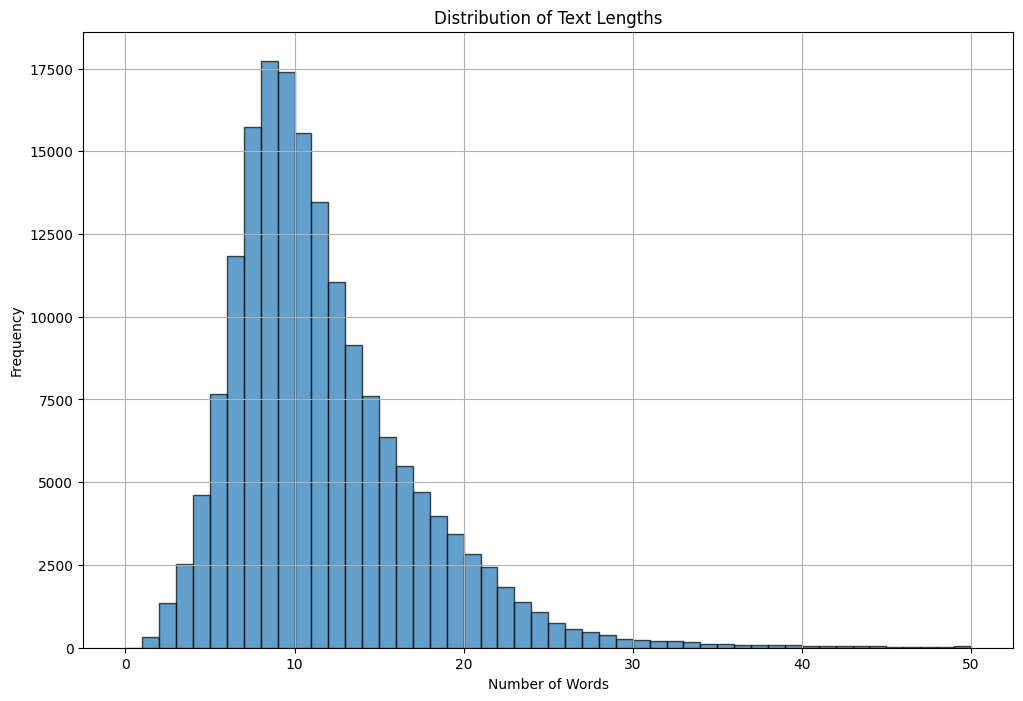

In [6]:
# Drop NaN values
eda_data = data.dropna(subset=['original_text'])

# Visualize the length of the sequences with more details
text_lengths = eda_data['original_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 8))
plt.hist(text_lengths, bins=50, range=(0, 50), edgecolor='k', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Insights from Text Length Distribution**

The histogram of text lengths shows the distribution of the number of words in the `original_text` column. Here are some key insights:

1. **Most Common Lengths**: The majority of the texts have lengths between 5 and 15 words, indicating that most of the texts are relatively short.
2. **Peak Frequency**: There is a noticeable peak around 10 words, suggesting that this is the most common text length in the dataset.
3. **Longer Texts**: There are fewer texts with lengths greater than 20 words, indicating that longer texts are less common in this dataset.
4. **Shorter Texts**: Similarly, texts with fewer than 5 words are also less frequent, suggesting that very short texts are not typical in this dataset.

These insights can help in understanding the nature of the text data and can be useful for further preprocessing and model development steps.

## Word Cloud

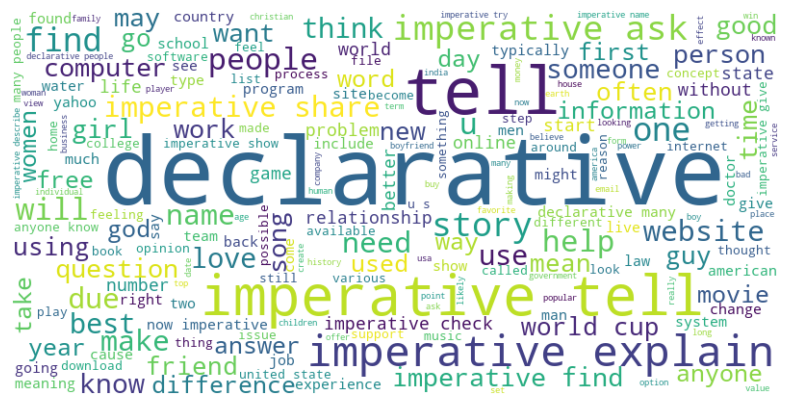

In [7]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text from the 'original_text' column into a single string
text = ' '.join(eda_data['original_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud generated from the `original_text` column in the dataset provides a visual representation of the most frequently occurring words. Here are some insights:

1. **Common Words**: The most prominent words in the word cloud are "what", "why", "how", "does", and "is". This indicates that the dataset contains a lot of questions, which is consistent with the nature of the data.


# Data Preparation

## Data Cleaning

In [8]:
data.dropna(inplace=True)
data.isna().sum()

topic_category    0
original_text     0
base_word_text    0
dtype: int64

## Data Preprocessing

In [9]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
stop_words.update(["imperative", "declarative"])
punctuation = string.punctuation

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'original_text' column
data['processed_text'] = data['original_text'].apply(preprocess_text)
data[['original_text', 'processed_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,original_text,processed_text
0,what makes friendship click?,makes friendship click
1,why does zebras have stripes?,zebras stripes
2,what did the itsy bitsy sipder climb up?,itsy bitsy sipder climb
3,what is the difference between a bachelors and...,difference bachelors masters degree
4,why do women get pms?,women get pms


## Feature Extraction

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the processed text data
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])


In [11]:
from sklearn.decomposition import PCA

# Convert sparse matrix to dense matrix
X_tfidf_dense = X_tfidf.toarray()

# Initialize PCA
pca = PCA(n_components=10)  # Adjust n_components as needed

# Fit and transform the TF-IDF features
X_pca = pca.fit_transform(X_tfidf_dense)

# Print the PCA result
print(X_pca)

[[-5.41994022e-02 -1.46507005e-02 -8.76946212e-03 ... -6.73978073e-03
  -1.25807621e-02  1.27875672e-04]
 [-5.27950587e-02 -1.33469124e-02 -7.48316682e-03 ... -6.93010731e-03
  -1.12712128e-02  1.19882744e-03]
 [-5.27950587e-02 -1.33469124e-02 -7.48316682e-03 ... -6.93010731e-03
  -1.12712128e-02  1.19882744e-03]
 ...
 [-5.05114482e-02 -1.52449085e-02 -8.21356318e-03 ... -1.35243492e-02
  -2.00559799e-02  1.41943196e-03]
 [-5.55474254e-02 -1.56563253e-02 -1.02659854e-02 ... -1.25007726e-02
  -1.01007379e-02  8.33346311e-03]
 [ 2.19518710e-01 -3.09656435e-03 -2.99537737e-03 ... -4.39897787e-03
  -1.64984459e-02 -1.46246056e-03]]


## Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

X = X_pca
y = data['topic_category'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development

## Support Vector Classifier

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Naive Bayes
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [14]:
svm_predictions = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, svm_predictions))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.21      0.19      0.20      3408
         2.0       0.16      0.61      0.25      3585
         3.0       0.20      0.21      0.20      3403
         4.0       0.15      0.01      0.03      3523
         5.0       0.39      0.34      0.36      3517
         6.0       0.34      0.29      0.31      3530
         7.0       0.19      0.06      0.09      3469
         8.0       0.37      0.20      0.26      3538
         9.0       0.30      0.27      0.28      3358
        10.0       0.22      0.09      0.13      3451

    accuracy                           0.23     34782
   macro avg       0.25      0.23      0.21     34782
weighted avg       0.25      0.23      0.21     34782



## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
rf_predictions = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, rf_predictions))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.30      0.28      0.29      3408
         2.0       0.27      0.48      0.35      3585
         3.0       0.35      0.35      0.35      3403
         4.0       0.25      0.18      0.21      3523
         5.0       0.45      0.51      0.48      3517
         6.0       0.47      0.44      0.45      3530
         7.0       0.27      0.21      0.24      3469
         8.0       0.39      0.33      0.36      3538
         9.0       0.39      0.41      0.40      3358
        10.0       0.36      0.31      0.34      3451

    accuracy                           0.35     34782
   macro avg       0.35      0.35      0.35     34782
weighted avg       0.35      0.35      0.35     34782



## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
lr_predictions = lr_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, lr_predictions))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.23      0.11      0.15      3408
         2.0       0.17      0.13      0.15      3585
         3.0       0.17      0.13      0.15      3403
         4.0       0.12      0.00      0.01      3523
         5.0       0.14      0.66      0.24      3517
         6.0       0.25      0.42      0.32      3530
         7.0       0.17      0.02      0.04      3469
         8.0       0.33      0.17      0.22      3538
         9.0       0.24      0.13      0.17      3358
        10.0       0.17      0.09      0.11      3451

    accuracy                           0.19     34782
   macro avg       0.20      0.19      0.16     34782
weighted avg       0.20      0.19      0.16     34782

